# Three attributes game

Each action has 3 numerical atributes.  The three attributes are ranked for tiebreaking.  You win if your action is greater than the opponent's action in 2 out of 3 attributes.  In case that one attribute is tied, the tie is broken based on the rank of the winning attribute.

In the following, consider 3 non-negative integer attributes, each of which takes values {0, 1, 2, 3}.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# get all integer vectors with entries {0, ..., 5}
temp = np.ones((11, 11, 11))
vectors = np.array(np.nonzero(temp)).T
# restrict to vectors with range of costs
sums = 2.3 * vectors[:, 0]*vectors[:, 1]/7 + 1.5 * vectors[:, 0]*vectors[:, 2]/7 + vectors[:, 2]*vectors[:, 1]/7
vectors = vectors[np.logical_and(sums >= 15, sums <= 20)]
sums = 2.3 * vectors[:, 0]*vectors[:, 1]/7 + 1.5 * vectors[:, 0]*vectors[:, 2]/7 + vectors[:, 2]*vectors[:, 1]/7

#vectors

In [3]:
# compute payoff sign matrix
a0_dom = np.sign(vectors[:, [0]] - vectors[:, [0]].T)
a1_dom = np.sign(vectors[:, [1]] - vectors[:, [1]].T)
a2_dom = np.sign(vectors[:, [2]] - vectors[:, [2]].T)

scores = 4 * (a0_dom > 0).astype(int) + 3 * (a1_dom > 0).astype(int) + 2 * (a2_dom > 0).astype(int)
win_mat = (scores > scores.T).astype(int)
p_sign = win_mat - win_mat.T



In [4]:
flag = True
# delete strictly dominating or dominant vectors
while flag:
    to_delete = np.logical_or(np.sum(p_sign == 1, 1) == 0, np.sum(p_sign == -1, 1) == 0)
    print(vectors[to_delete])
    vectors = vectors[~to_delete]
    p_sign = p_sign[~to_delete, :][:, ~to_delete]
    flag = (np.sum(to_delete) > 0)
len(vectors)

[]


169

In [5]:
# function to form payoff matrix from signs and rewards
def form_payoff(p_sign, rewards):
    payoff = np.dot(np.diag(rewards), (p_sign==1))
    payoff = payoff - payoff.T
    return payoff

In [6]:
# tune rewards
n = len(vectors)
# desired nash equilibrium
target_p = np.ones(n)
target_p[np.min(vectors, 1)==0] = 0.05
target_p[np.min(vectors, 1) > 2] = 2.0
target_p = target_p/np.sum(target_p)

def tune_rewards(p_sign, target_p, learning_rate = 0.002, n_iterations = 50000):
    # uniform rewards to begin
    rewards = np.ones(len(p_sign))
    # determine values of strategies
    # decrease the rewards of high-value strategies and increase the rewards of low-value strategies
    all_rewards = []
    all_values = []

    for iter_no in range(n_iterations):
        all_rewards.append(rewards)
        payoff = form_payoff(p_sign, rewards)
        values = np.dot(payoff, target_p)
        all_values.append(values)
        rewards = rewards - learning_rate * values

    all_rewards = np.array(all_rewards)
    all_values = np.array(all_values)
    return rewards, values, all_rewards, all_values

In [7]:
rewards, values, all_rewards, all_values = tune_rewards(p_sign, target_p)

In [8]:
np.sort(rewards)

array([0.10122732, 0.13787307, 0.15453677, 0.19201103, 0.20735167,
       0.24004853, 0.25896453, 0.27342647, 0.29821977, 0.3144303 ,
       0.31709081, 0.32047026, 0.33139642, 0.33160207, 0.34636732,
       0.38001999, 0.3871495 , 0.39481689, 0.40493484, 0.42614154,
       0.43461931, 0.43783854, 0.43935207, 0.44944743, 0.45589878,
       0.46440531, 0.47129914, 0.47294785, 0.47802022, 0.48210873,
       0.48676472, 0.49280187, 0.50586602, 0.52877238, 0.53200373,
       0.53452348, 0.53529668, 0.54733511, 0.55310974, 0.55810585,
       0.56741508, 0.57173359, 0.5749571 , 0.57831384, 0.57850422,
       0.57945418, 0.58694087, 0.59729045, 0.59791457, 0.59793228,
       0.59925983, 0.61634456, 0.61686485, 0.6203239 , 0.62035807,
       0.62484848, 0.63793765, 0.63931898, 0.66537271, 0.67970623,
       0.68489246, 0.6855794 , 0.68869991, 0.69610037, 0.70123357,
       0.70934702, 0.70985662, 0.71192445, 0.71654661, 0.7196487 ,
       0.72182849, 0.72926975, 0.73593629, 0.74102363, 0.74188

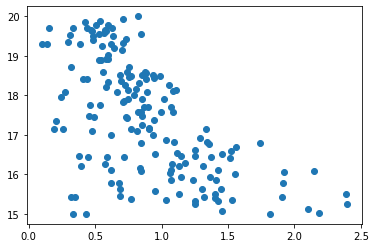

In [9]:
plt.scatter(rewards, sums)

In [10]:
vectors[np.argsort(rewards)]

array([[ 9,  0, 10],
       [10,  0,  9],
       [ 1, 10, 10],
       [ 8,  0, 10],
       [ 9,  0,  9],
       [ 1,  9, 10],
       [10,  0,  8],
       [ 1, 10,  9],
       [ 8,  1,  9],
       [ 9,  1,  8],
       [ 7,  1, 10],
       [ 8,  0,  9],
       [ 7,  0, 10],
       [ 6, 10,  0],
       [ 9,  0,  8],
       [ 1,  9,  9],
       [10,  1,  7],
       [ 1,  8, 10],
       [ 7,  8,  0],
       [ 6,  5,  5],
       [10,  0,  7],
       [10,  6,  0],
       [ 8,  7,  0],
       [ 1, 10,  8],
       [ 8,  1,  8],
       [ 6,  9,  0],
       [ 6,  2, 10],
       [ 7,  1,  9],
       [ 2,  9,  8],
       [ 2,  8,  9],
       [ 5,  6,  5],
       [ 9,  1,  7],
       [ 5,  7,  4],
       [ 7,  4,  5],
       [ 2,  7, 10],
       [ 9,  6,  0],
       [ 4,  6,  7],
       [ 7,  2,  8],
       [ 8,  2,  7],
       [ 7,  7,  1],
       [ 2, 10,  7],
       [ 6,  1, 10],
       [ 8,  4,  4],
       [ 6,  3,  8],
       [ 5, 10,  1],
       [ 6,  8,  1],
       [ 5, 10,  0],
       [ 6,  

In [11]:
for i in range(5):
    # filter out values with rewards much higher or lower than median
    np.median(rewards)
    filt = np.logical_and(rewards > 0.3 * np.median(rewards), rewards < 3 * np.median(rewards))
    vectors = vectors[filt]
    p_sign = p_sign[filt, :][:, filt]
    n = len(vectors)
    target_p = np.ones(n)
    target_p[np.min(vectors, 1)==0] = 0.05
    target_p[np.min(vectors, 1) > 2] = 2.0
    target_p = target_p/np.sum(target_p)
    print(n)
    rewards, values, all_rewards, all_values = tune_rewards(p_sign, target_p)

163
163
163
163
163


In [12]:
rewards, values, all_rewards, all_values = tune_rewards(p_sign, target_p)

In [13]:
np.sort(rewards)

array([0.25652332, 0.27490414, 0.29507146, 0.3114162 , 0.31701494,
       0.31761396, 0.33171652, 0.33192495, 0.34283563, 0.37853852,
       0.38349783, 0.39358582, 0.40088868, 0.41936006, 0.43045113,
       0.43405871, 0.43516741, 0.45076094, 0.45111254, 0.46340712,
       0.46761762, 0.47252025, 0.47900878, 0.47923826, 0.4796108 ,
       0.48803968, 0.49814748, 0.52103172, 0.52746159, 0.52978   ,
       0.53898906, 0.54099425, 0.54708572, 0.55210887, 0.56728556,
       0.57052077, 0.57248382, 0.57308485, 0.57414329, 0.58049103,
       0.5882864 , 0.58853776, 0.58906371, 0.58963817, 0.59313981,
       0.61056475, 0.61062105, 0.61388551, 0.61447144, 0.61493595,
       0.63290051, 0.63627265, 0.65737734, 0.67310466, 0.67767918,
       0.67792408, 0.6809396 , 0.68808024, 0.6911295 , 0.70124594,
       0.70478488, 0.70643228, 0.71230345, 0.71338584, 0.71552686,
       0.72170921, 0.73076447, 0.73309859, 0.73400761, 0.73660066,
       0.74359173, 0.74507424, 0.74709245, 0.76056593, 0.76201

In [14]:
# discretize rewards
d_rewards = np.floor(rewards/np.min(rewards) * 2)
probs = np.ones(len(p_sign))/len(p_sign)
payoff = form_payoff(p_sign, d_rewards)
np.max(d_rewards)

18.0

In [15]:
def evolve_strategy(payoff, probs, learning_rate = 0.0005, n_iterations = 1000000):

    all_probs = []
    all_values = []

    for iter_no in range(n_iterations):
        all_probs.append(probs)
        #probs = np.mean(all_probs, 0)
        #print(probs)
        values = np.dot(payoff, probs)
        all_values.append(values)
        probs = probs * (1 + learning_rate * values)
        probs = probs/np.sum(probs)

    all_probs = np.array(all_probs)
    all_values = np.array(all_values)
    probs = np.mean(all_probs[int(n_iterations/2):, :], 0)
    values = np.dot(payoff, probs)
    return probs, values, all_probs, all_values

In [16]:
probs, values, all_probs, all_values = evolve_strategy(payoff, probs, 0.0001, 1000000)

In [17]:
np.max(values), np.min(values)

(0.06409368971399199, -0.6659565177905936)

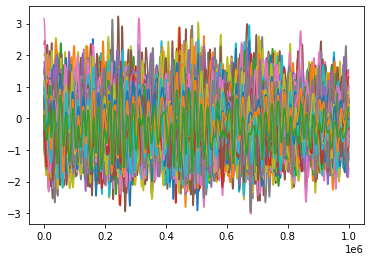

In [18]:
plt.plot(all_values)
plt.show()

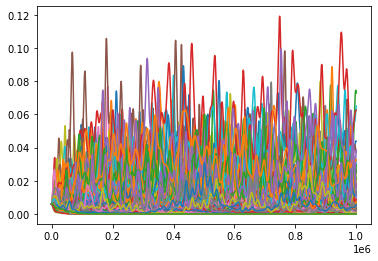

In [19]:
plt.plot(all_probs)
plt.show()

In [20]:
np.sum(probs > 0.01)

43

In [21]:
results = pd.DataFrame({
    'VP': d_rewards.astype(int), 
    'A0': vectors[:, 0], 'A1': vectors[:, 1], 'A2': vectors[:, 2], 
    'total': np.sum(vectors, 1),
    'prob': np.floor(probs* 1000)/10})
results.iloc[np.argsort(-probs)[:np.sum(probs > 0.001)], :].reset_index(drop = True)

,VP,A0,A1,A2,total,prob
0,4,7,4,5,16,5.7
1,4,6,8,1,15,4.3
2,6,8,5,2,15,4.2
3,7,5,3,9,17,4.0
4,10,6,3,6,15,3.4
...,...,...,...,...,...,...
59,2,8,1,9,18,0.1
60,7,8,5,1,14,0.1
61,14,5,3,7,15,0.1
62,3,6,5,5,16,0.1


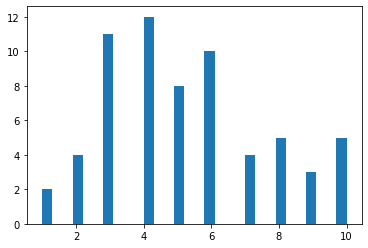

In [22]:
plt.hist(results.loc[np.argsort(-probs)[:np.sum(probs > 0.001)], 'A0'], 30)
plt.show()

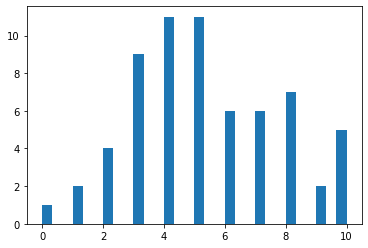

In [23]:
plt.hist(results.loc[np.argsort(-probs)[:np.sum(probs > 0.001)], 'A1'], 30)
plt.show()

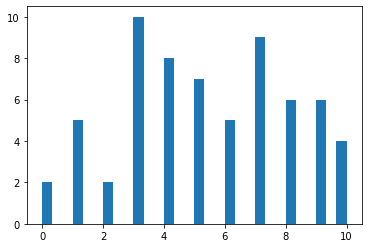

In [24]:
plt.hist(results.loc[np.argsort(-probs)[:np.sum(probs > 0.001)], 'A2'], 30)
plt.show()

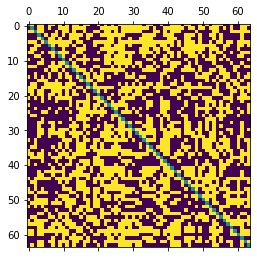

In [25]:
inds = np.argsort(-probs)[:np.sum(probs > 0.001)]
plt.matshow(p_sign[inds, :][:, inds])